In [1]:
from functions import *
from utility_functions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import networkx as nx
from matplotlib.pyplot import figure, text
from matplotlib import gridspec
import os
import datetime
import math


#Building the neural network
import re
from collections import defaultdict
from community import community_louvain
import random
import pickle
import math

2024-05-13 12:42:48.149575: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-13 12:42:48.376512: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /shared/centos7/anaconda3/2022.05/lib:/shared/centos7/nodejs/14.15.4/lib
2024-05-13 12:42:48.376555: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-05-13 12:42:54.879795: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'

In [2]:
months=['2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05']

In [3]:
target='region'
Kmer=[100]
#Kmer=[100]
kmer=Kmer[0]
Ngram_size=[1]
threshold=200
sample_size=200
start=4
start_month=months[start]
print(start_month)

2020-04


figures/TemporalAccuracy_and_COVID_VOC_occurrences_regionlevel_cv5fold_start2020-04_threshold200_SampleSize200_kmer100.png


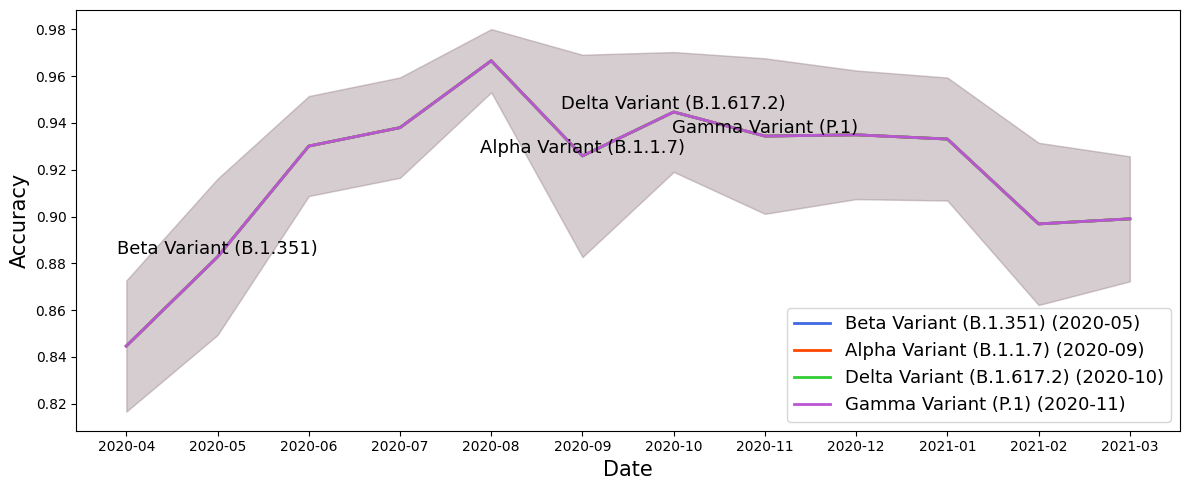

In [9]:

accuracy_aggregated_mean=defaultdict()
for i in range(start,len(months)-2):    
    month_i=months[i]
    path='cross_validation_prediction/accuracy_true_BinaryNB_monthly%s_countrylevel_cv5fold_threshold%d_SampleSize%d_kmer%d.pickle'%(month_i,threshold,sample_size,kmer)

    with open(path, 'rb') as handle:
        accuracy_true = pickle.load(handle)
    accuracy_aggregated_mean[month_i]=np.mean(list(accuracy_true.values()))

    
    

accuracy_aggregated_var=defaultdict()
for i in range(4,len(months)-2):    
    month_i=months[i]
    path='cross_validation_prediction/accuracy_true_BinaryNB_monthly%s_countrylevel_cv5fold_threshold%d_SampleSize%d_kmer%d.pickle'%(month_i,threshold,sample_size,kmer)

    with open(path, 'rb') as handle:
        accuracy_true = pickle.load(handle)
    accuracy_aggregated_var[month_i]=np.var(list(accuracy_true.values()))

    



voc_timepoints = {'2020-05': 'Beta Variant (B.1.351)',
                  '2020-09': 'Alpha Variant (B.1.1.7)',
                  '2020-10': 'Delta Variant (B.1.617.2)',
                  '2020-11': 'Gamma Variant (P.1)'}


dates = list(accuracy_aggregated_mean.keys())
mean_values = list(accuracy_aggregated_mean.values())
variance_values = list(accuracy_aggregated_var.values())

std_dev_values = [math.sqrt(var) for var in variance_values]

color_palette = ['royalblue', 'orangered', 'limegreen', 'mediumorchid']

plt.figure(figsize=(12, 5))
plt.style.use('default')

for i, (timepoint, voc_name) in enumerate(voc_timepoints.items()):
    plt.plot(dates, mean_values, linestyle='-', linewidth=2, markersize=10, color=color_palette[i % len(color_palette)],
             label=f'{voc_name} ({timepoint})')
    
    # Add the confidence interval
    plt.fill_between(dates, 
                     [m - s for m, s in zip(mean_values, std_dev_values)], 
                     [m + s for m, s in zip(mean_values, std_dev_values)], 
                     color=color_palette[i % len(color_palette)], 
                     alpha=0.1)

plt.xlabel('Date', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.grid(False)
plt.legend(loc='lower right', fontsize=13, frameon=True)
#plt.legend(loc='best', fontsize=13, frameon=True)

# Add annotations to the timepoints
for timepoint, voc_name in voc_timepoints.items():
    plt.annotate(f'{voc_name}', (timepoint, accuracy_aggregated_mean[timepoint]), textcoords="offset points", fontsize=13, xytext=(0, 2),
                 ha='center')


fig_path=f'figures/TemporalAccuracy_and_COVID_VOC_occurrences_{target}level_cv5fold_start{start_month}_threshold{threshold}_SampleSize{sample_size}_kmer{kmer}.png'
print(fig_path)
#plt.savefig(fig_path, dpi=300)
plt.tight_layout()
plt.show()


figures/TemporalAccuracy_and_COVID_VOC_occurrences_regionlevel_cv5fold_start2020-04_threshold200_SampleSize200_kmer100.pdf


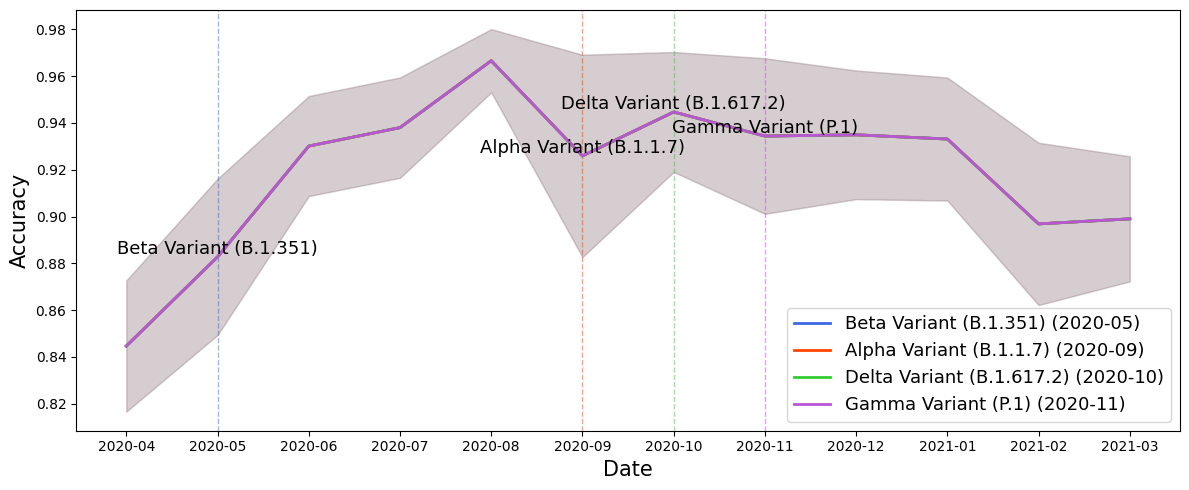

In [13]:

voc_timepoints = {'2020-05': 'Beta Variant (B.1.351)',
                  '2020-09': 'Alpha Variant (B.1.1.7)',
                  '2020-10': 'Delta Variant (B.1.617.2)',
                  '2020-11': 'Gamma Variant (P.1)'}

dates = list(accuracy_aggregated_mean.keys())
mean_values = list(accuracy_aggregated_mean.values())
variance_values = list(accuracy_aggregated_var.values())

std_dev_values = [math.sqrt(var) for var in variance_values]

color_palette = ['royalblue', 'orangered', 'limegreen', 'mediumorchid']

plt.figure(figsize=(12, 5))
plt.style.use('default')

for i, (timepoint, voc_name) in enumerate(voc_timepoints.items()):
    line_color = color_palette[i % len(color_palette)]
    plt.plot(dates, mean_values, linestyle='-', linewidth=2, markersize=10, color=line_color,
             label=f'{voc_name} ({timepoint})')

    # Add the confidence interval
    plt.fill_between(dates,
                     [m - s for m, s in zip(mean_values, std_dev_values)],
                     [m + s for m, s in zip(mean_values, std_dev_values)],
                     color=line_color,
                     alpha=0.1)

    # Add vertical lines at the timepoints when the VOCs occurred
    plt.axvline(timepoint, linestyle='--', linewidth=1, color=line_color, alpha=0.5)

plt.xlabel('Date', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.grid(False)
plt.legend(loc='lower right', fontsize=13, frameon=True)

for timepoint, voc_name in voc_timepoints.items():
    plt.annotate(f'{voc_name}', (timepoint, accuracy_aggregated_mean[timepoint]), textcoords="offset points", fontsize=13, xytext=(0, 2),
                 ha='center')

fig_path=f'figures/TemporalAccuracy_and_COVID_VOC_occurrences_{target}level_cv5fold_start{start_month}_threshold{threshold}_SampleSize{sample_size}_kmer{kmer}.pdf'
print(fig_path)
#plt.savefig(fig_path, dpi=300)
plt.savefig(fig_path)

plt.tight_layout()
plt.show()
